In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from src.utils.seed import set_seed
from src.utils.config import Config
from src.aggregation import GeneAggregator

set_seed(42)
print("Gene-level ranking and aggregation notebook")

c:\Users\surya\anaconda3\envs\torch-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Gene-level ranking and aggregation notebook


In [2]:
config = Config('../configs/config.yaml')

variant_scores = np.random.rand(1000)
gene_ids = np.random.choice([f"GENE_{i:04d}" for i in range(100)], 1000)

df = pd.DataFrame({
    'gene_id': gene_ids,
    'variant_score': variant_scores
})

print(f"Loaded {len(df)} variant scores across {df['gene_id'].nunique()} genes")
df.head()

Loaded 1000 variant scores across 100 genes


,gene_id,variant_score
0,GENE_0046,0.374540
1,GENE_0011,0.950714
2,GENE_0061,0.731994
3,GENE_0079,0.598658
4,GENE_0087,0.156019


In [3]:
aggregator = GeneAggregator(method='max')

gene_score_df = aggregator.aggregate(
    variant_df=df,
    score_col='variant_score',
    gene_col='gene_id'
)

print(f"Aggregated to {len(gene_score_df)} gene scores")
print("\nTop 10 genes by score:")
print(gene_score_df.head(10))

Aggregated to 100 gene scores

Top 10 genes by score:
     gene_id  gene_score  n_variants
0  GENE_0050    0.999718           6
1  GENE_0001    0.996874          12
2  GENE_0043    0.996637          13
3  GENE_0065    0.992965           8
4  GENE_0088    0.990505          14
5  GENE_0038    0.990054          13
6  GENE_0004    0.989960          11
7  GENE_0011    0.987276          11
8  GENE_0024    0.986887          13
9  GENE_0044    0.986640          11


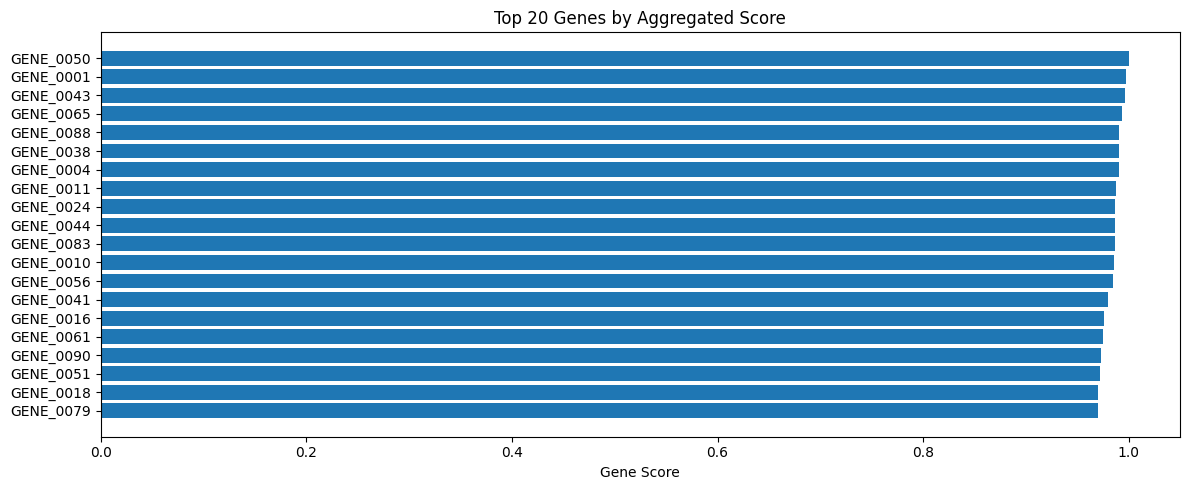

In [4]:
# gene_score_df is already created and sorted in the previous cell
# Visualize top 20 genes
plt.figure(figsize=(12, 5))
plt.barh(range(20), gene_score_df['gene_score'].head(20).values)
plt.yticks(range(20), gene_score_df['gene_id'].head(20).values)
plt.xlabel('Gene Score')
plt.title('Top 20 Genes by Aggregated Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
os.makedirs('../reports/results', exist_ok=True)
gene_score_df.to_csv('../reports/results/ranked_genes.csv', index=False)

print("✓ Gene-level ranking complete!")
print("Results saved to: reports/results/ranked_genes.csv")

✓ Gene-level ranking complete!
Results saved to: reports/results/ranked_genes.csv
